# C1. A simple example of linear regression

## 1. Import libraries

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## 2. Create a dataset

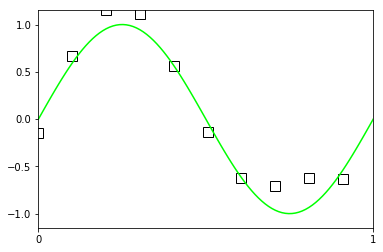

In [25]:
# create the x-grid of samples
x   = np.linspace(0.0,1.0,100)
# generate samples following a sinus function
y_t = np.sin(2*np.pi*x)
# add gaussian noise: mean = 0, var = 0.1
y_o = y_t + np.random.normal(0.0, 0.2, x.shape)

# split samples indices into a train (10 samples) and test set (90 samples)
i       = np.linspace(1,100,100, dtype=int)-1
i_train = i[0:100:10]
i_test  = np.setdiff1d(i, i_train)

# display the true and noisy train samples
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10, fillstyle='none')
plt.plot(x,y_t,'-', color='lime', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.show()


## 3. Fit a polynomial model

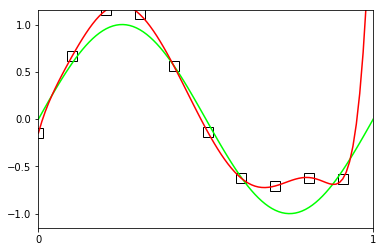

The RMSE on the train set is: 1.1833734807860565e-12


In [27]:
## fit a polynomial regression model to the dataset

# define polynomial order (def=1)
poly_order = 1
poly=PolynomialFeatures(degree=poly_order)
# expand x (or linearize the problem)
# this is specific to sklearn, could be done in a simple way with numpy
x_poly=poly.fit_transform(x.reshape(-1, 1))

# fit polynomial function (with least square errors)
clf = linear_model.LinearRegression()
clf.fit(x_poly[i_train], y_o[i_train])

# predict values from model
y_p = clf.predict(x_poly[i])

# display the predicted values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10, fillstyle='none')
plt.plot(x,y_t,'-', color='lime', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.plot(x,y_p,'r-', fillstyle='none')
plt.show()

# compute score (LS)
e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())

print("The RMSE on the train set is:", e_train)



### Question 1:

Q1.1 REDO this part with increasing polynomial order from 0 to 15  
Q1.2 What do you observe? Do you have an idea about what is going on?

## 4. Memory and generalization

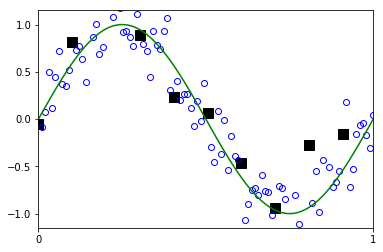

In [10]:
## Now we redo the same experiment but adding the test samples
## Fit on the train set
## Evaluate on the train AND the test set

# First, we display the true values and the train/test noisy values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10)
plt.plot(x[i_test],y_o[i_test],'bo', fillstyle='none')
plt.plot(x,y_t,'g-', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.show()


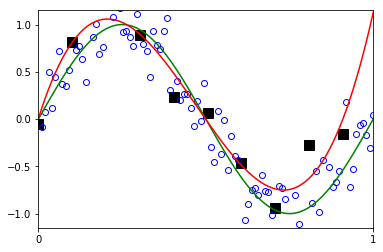

The RMSE on the train set is: 0.17644175736652667
The RMSE on the test set is: 0.391993745008083


In [11]:
## Now we run again the experiments, but with computing the error on the test set also

# define polynomial order
poly_order = 3
poly=PolynomialFeatures(degree=poly_order)
# expand x (or linearize the problem)
# this is specific to sklearn, could be done in a simple way with numpy
x_poly=poly.fit_transform(x.reshape(-1, 1))

# fit polynomial function (with least square errors)
clf = linear_model.LinearRegression()
clf.fit(x_poly[i_train], y_o[i_train])

# predict values from model
y_p = clf.predict(x_poly[i])

# display the predicted values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10)
plt.plot(x[i_test],y_o[i_test],'bo', fillstyle='none')
plt.plot(x,y_t,'g-', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.plot(x,y_p,'r-', fillstyle='none')
plt.show()

# compute score (LS)
e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())
e_test  = np.sqrt(1/len(i_test)*((y_p[i_test] - y_o[i_test])**2).sum())

print("The RMSE on the train set is:", e_train)
print("The RMSE on the test set is:", e_test)

###

### Question 2

Q2.1 REDO this part with increasing polynomial order from 0 to 15  
Q2.2 Report all the errors in a table  
Q2.3 What can you conclude now?  
Q2.4 What is the best model? Explain